# Julia sets


This is an advanced project that explores fractals. 


A Julia set is a fractal closely related to the Mandelbrot set. Julia sets are self similar; 
like a painting of a car made of little paintings of a car.


Our goal is to begin with some
code that creates a little Julia set drawing with no explanation. Then we start down the path to
understand how this code works. In order to do that we poke our noses in the
door of some new mathematics, the mathematics of complex numbers. We will cover just enough 
to get by.


After this we get back to coding in Python.


Here is the first part, a starter Julia set drawn using Turtle graphics.

In [11]:
from turtle import Turtle, tracer, update, screensize, Screen
from math import sqrt

def zspcn(z, c, n):
    '''
    zspcn() abbreviates z squared plus a constant c repeated n times.
    This is a function applied to a complex number that feeds the output
    back into the input a bunch of times to see what happens.
    '''
    if z[0]**2 + z[1]**2 > 10. or n == 0: return z
    nprime  = n - 1
    zprime  = (z[0]**2 - z[1]**2 + c[0], 2*z[0]*z[1] + c[1])
    return zspcn(zprime, c, nprime)

def dotcolor(z, c, n):
    zp = zspcn(z, c, n)
    r = sqrt(z[0]*z[0] + z[1]*z[1]) / sqrt(zp[0]*zp[0] + zp[1]*zp[1])
    if   r < 0.2: return 'black'
    elif r < 0.4: return 'blue'
    elif r < 0.6: return 'cyan'
    elif r < 0.8: return 'green'
    elif r < 1.0: return 'orange'
    elif r < 1.2: return 'red'
    else:         return 'white'

block  = 200
nIter  = 10
i0, iN = -block, block + 1     # used in the coordinate loop
j0, jN = -block, block + 1
xF = 1.2/math.fabs(i0)         # convert image pixel coordinate to numbers close to zero
yF = 1.2/math.fabs(j0)

Screen().setup(width=2*block, height=2*block)
screensize(canvwidth=block, canvheight=block, bg="white")
t = Turtle(); t.hideturtle(); t.speed(0); t.penup(); tracer(0,0), t.setpos(i0, j0)

for i in range(i0, iN):
    a = i * yF
    for j in range(j0, jN):
        b = j * yF
        t.setposition(i, j); t.dot(1, dotcolor((a, b), (-.8, 0.156), nIter))
            
update()

## Complex numbers


Julia sets are fractals as I mentioned. They depend upon a number system called *complex numbers*.
Complex numbers are described here just enough so that we can put them to work exploring Julia sets.


You are probably used to numbers like $1, 2, 3$ and so on; as well as numbers like $4.3$ and $-19.8$ 
and $7/9$. Let's call these the *simple* numbers for today; just a term I made up for contrast. 
(Their proper name is *real* numbers.) Anyway now that we have *simple* numbers we can pretend to
invent a new kind of number that is more *complicated*.


Let's create a new number that is made from two simple numbers as follows: 


- $z = (1, 2)$
- $z = (4.3, -19.8)$
- $z = (1/3, 7/9)$


Each value of $z$ is a *complex number*. They are interesting (even surprising) while also and at
the same time similar to the numbers we are familiar with.


Complex numbers have their own rules for addition and subtraction; which you might easily guess.


Here is the rule for addition, with an example:


$(a, b) + (c, d) = (a + c, b + d)$


$(7, 3) + (-2, 5) = (5, 8)$


Now for subtraction:


$(a, b) - (c, d) = (a - c, b - d)$


$(7, 4) - (-2, 5) = (9, -1)$


When we add or subtract two complex numbers the result is also a complex number. 

### Complex multiplication and division


There are rules for multiplying and dividing complex numbers. These rules take some getting used
to so we skip them for the moment. 


### Absolute values of complex numbers


The absolute value of a simple number is "how far away is the number from zero". $-5$ is $5$ away from $0$
so we say the absolute value of $-5$ is $5$. Or we write $|-5| = 5$.


Now the absolute value of the complex number $(5, 0)$ is also $5$ so we write $|(5, 0)| = 5$.
This is a clue that when the second number of a complex number is $0$ the complex number is 
just like an ordinary "simple" number. Which is true. 


Another complex number that has an absolute value of $5$ is the number $(4, 3)$. Also $(3, 4)$ has
an absolute value of $5$. So does $(-4, -3)$ and $(3, -4)$. 


It may occur to you that a right triangle with sides equal to $3$ and $4$ has a *hypotenuse* of $5$.
This is no coincidence! The absolute value of a complex number is the length of its hypotenuse if we
treat the two numbers like legs of a triangle. Abstractly if $z = (a, b)$ then 


$\begin{align}|z| = |(a, b)| = \sqrt{a^2 + b^2}\end{align}$


Writing this out in words: The absolute value of a complex number $(a, b)$ is the square root
of the sum of the squares of $a$ and $b$. Now $a$ and $b$ are permitted to be negative but this
does not change the result because $a^2$ and $b^2$ are both positive. 


This might suggest to you that complex numbers can be drawn as dots on an x-y plane.
Perhaps the first number is the x-coordinate and the second number is the y-coordinate.
This is quite true and it immediately gives us two good things...


First the x-y plane gives us an extension of the number line (which has one dimension) to 
an entire (two dimensional) world where every dot has a distance from the origin which is
its absolute value. 


Second now that we have a two dimensional surface we are free to draw pictures on it.
This is the point of this little journey into Julia sets.


### squaring complex numbers


The last bit of preparation we need is a rule for squaring a complex number. If the
number is $z$ then its square is written $z^2$. Here is the rule where again $z = (a, b)$.


$\begin{align}z^2 = (a, b)^2 = (a^2 - b^2, 2 a b)\end{align}$


This rule comes from complex multiplication; which was mentioned above. However as we are
going for just a *little bit* of math it seems like this is a good place to stop for now. 


To review: We have rules of arithmetic for complex numbers: Addition, subtraction, absolute
value, and squaring. These might *sort of* make sense but we can treat them like the rules
of a game we want to play, the "Julia set game", and proceed from there. To review:

$\begin{align}a \textrm{ and } b \textrm{ are real numbers we use to make a complex number } z = (a, b)\end{align}$

$\begin{align}(a, b) + (c, d) = (a + c, b + d)\end{align}$

$\begin{align}(a, b) - (c, d) = (a - c, b - d)\end{align}$

$\begin{align}|z| = |(a, b)| = \sqrt{a^2 + b^2}\end{align}$

$\begin{align}z^2 = (a, b)^2 = (a^2 - b^2, 2 a b)\end{align}$

$\begin{align}\textrm{Complex numbers can be drawn as points on an x-y plane.}\end{align}$

### The Julia set game


Here is the recipe for drawing a Julia set image made of pixels:


- Visit a block of complex numbers $z$
    - Each *location* for $z$ corresponds to a *pixel* in the Julia set image
- Run each $z$ through a *test* that results in a *color*
- Paint the pixel for $z$ that color


This is all very well and good but what, you may ask, is this *test*? To understand the test
we should take a moment to talk about *functions* and *recursion*. 


### Functions and recursion


A *function* takes an input and produces an output. Let's define $f(x) = 2 \cdot x$; then what is
$f(3)$? Not too bad: $f(3) = 2 \cdot 3 = 6$. So we put $3$ in and got $6$ back out. Now suppose
we hook up the output of the function back to the input: Each time we get a new output back it goes
into the function. This generates a sequence of numbers. 


$\begin{align}3 \rightarrow f(x) \rightarrow 6 \rightarrow f(x) \rightarrow 12 \rightarrow f(x) 
\rightarrow 24 \rightarrow f(x) \rightarrow 48 \end{align}$


So far so good: Our function values keep getting bigger and bigger. After we repeated the function
four times we wound up at $48$, starting from $3$. 


This idea of repeating the function over and over again -- putting the output back into the input -- is 
called *recursion*. In the above example the recursion *depth* was 4 because we used the function $f(x)$ 
four times. 


Let's do one more example using real numbers: Define $f(x) = x^2$ and let's input the number $.9$
and let's run this five times, again feeding the output back to the input. Now we have the sequence:


$\begin{align}
0.9 \rightarrow 
f(x) \rightarrow 0.81 \rightarrow
f(x) \rightarrow .6561 \rightarrow
f(x) \rightarrow 0.43046721 \rightarrow
f(x) \rightarrow 0.185302018885184 \rightarrow
f(x) \rightarrow 0.03433683820292509
\end{align}$


For the first example the input of $3$ resulted in an output of $48$, much larger. 


For the second example the input of $0.9$ resulted in an output of $0.034 \dots$, much smaller.


To summarize: We can feed the output of a function back to the input some number of times to 
get a final output. We can look at this final output and ask "Does this seem to be getting
*smaller* or *bigger*?" By this we mean getting down towards zero or getting farther and farther *away*
from zero. 


### The Julia set test


Now we can fill in the missing piece of the Julia set recipe: What is this "test" that we apply
to each complex number $z$? The answer is: We will put $z$ into a function $f(z)$ and iterate
this a number of times, just as above, and then ask the question "Is the result falling in
towards the origin? Or is it flying off towards infinity? Or does it hang around somewhere in 
between?" Let's call this the *z-test* for the Julia set. 


In the code above when the z-test falls towards the origin the pixel is colored *black*. When
the z-test gets really big the pixel is colored *white*. There are in-between colors as well: 
blue, cyan, green, orange and red.


Finally what is $f(z)$? This is the defining moment of the Julia set. We first pick a complex
number that will be a constant. Call this $c$. The code given here uses the constant
$c = (-0.8, 0.156)$. Now we can give the function: $f(z) = z^2 + c$. This is why we
had to describe how to square a complex number above: The square function is the first part
of the Julia set function. We also needed to know how to add two complex numbers so we could
add $c$ to $z^2$ in this function.


We also learned about the absolute value of a complex number $|z|$. Why so? Because after
we feed a complex number $z$ into $f(z)$ some number of times we will need to know how far
away we wound up from the origin... which is what the absolute value tells us. 




This is what *iteration* looks like: 


$z_1 = z^2 + c$


$z_2 = z_1^2 + c$


$z_3 = z_2^2 + c$


$\dots$


$z_{8} = z_7^2 + c$


Inside the $x y$ loop do this:



- Calulate the absolute values for the starting point $z$ and the end point $z_{10}$
- These are both distances; so they are positive real numbers
- Calculate their ratio $r = \frac{|z|}{|z_{10}|}$
    - if $r < 0.2$ make this pixel black
    - if $r > 2.0$ make this pixel white
    - otherwise make this pixel some color in between

# creates a second version of the Julia set


This code creates an image file in "portable grey map" format. Each pixel is a shade of grey.

In [28]:
# portable grey map file
import cmath
import numpy

w, h = 1200, 1200
re_min, re_max = -2.0, 2.0
im_min, im_max = -2.0, 2.0
c = complex(-0.8, 0.156)
real_range = numpy.arange(re_min, re_max, (re_max - re_min) / w)
imag_range = numpy.arange(im_max, im_min, (im_min - im_max) / h)
fout = open('julia.pgm', 'w')
fout.write('P2\n# Julia Set image\n' + str(w) + ' ' + str(h) + '\n255\n')
 
# Generate pixel values and write to file
for im in imag_range:
    for re in real_range:
        z = complex(re, im)
        n = 255
        while abs(z) < 10 and n >= 5:
            z = z*z + c
            n -= 5
        # Write pixel to file
        fout.write(str(n) + ' ')
    # End of row
    fout.write('\n')
 
# Close file
fout.close()

### display the second version


The result of the cell above is to write a file. Now we open the file, read the contents, 
and show them as an image. The coordinates are in pixels.

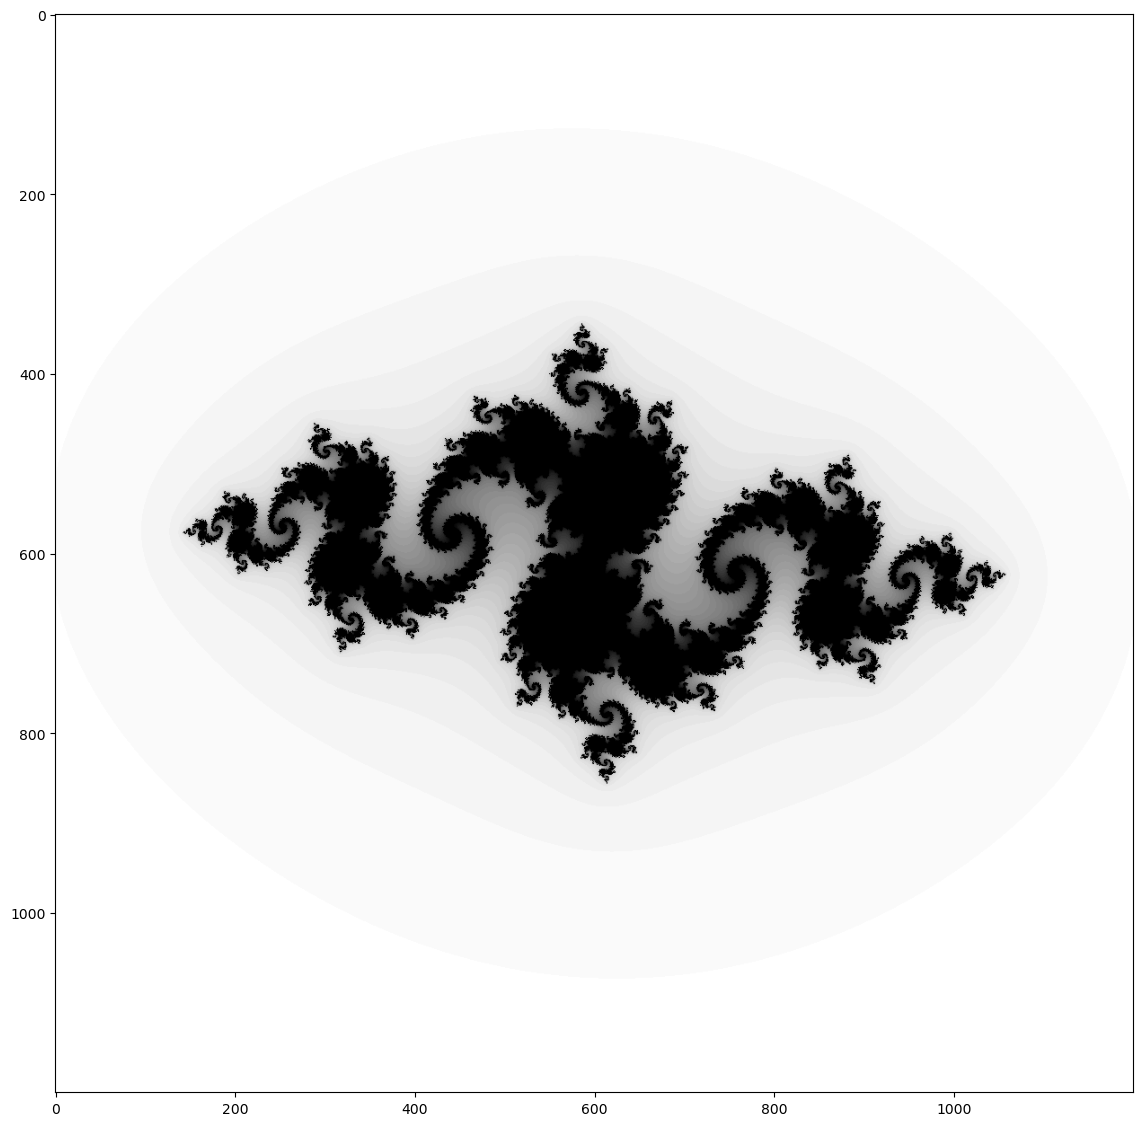

In [35]:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open("julia.pgm")
plt.figure(figsize=(14,14))
plt.imshow(img, cmap='grey')
# plt.axis('off')  # Turn off axis labels and ticks
plt.show()

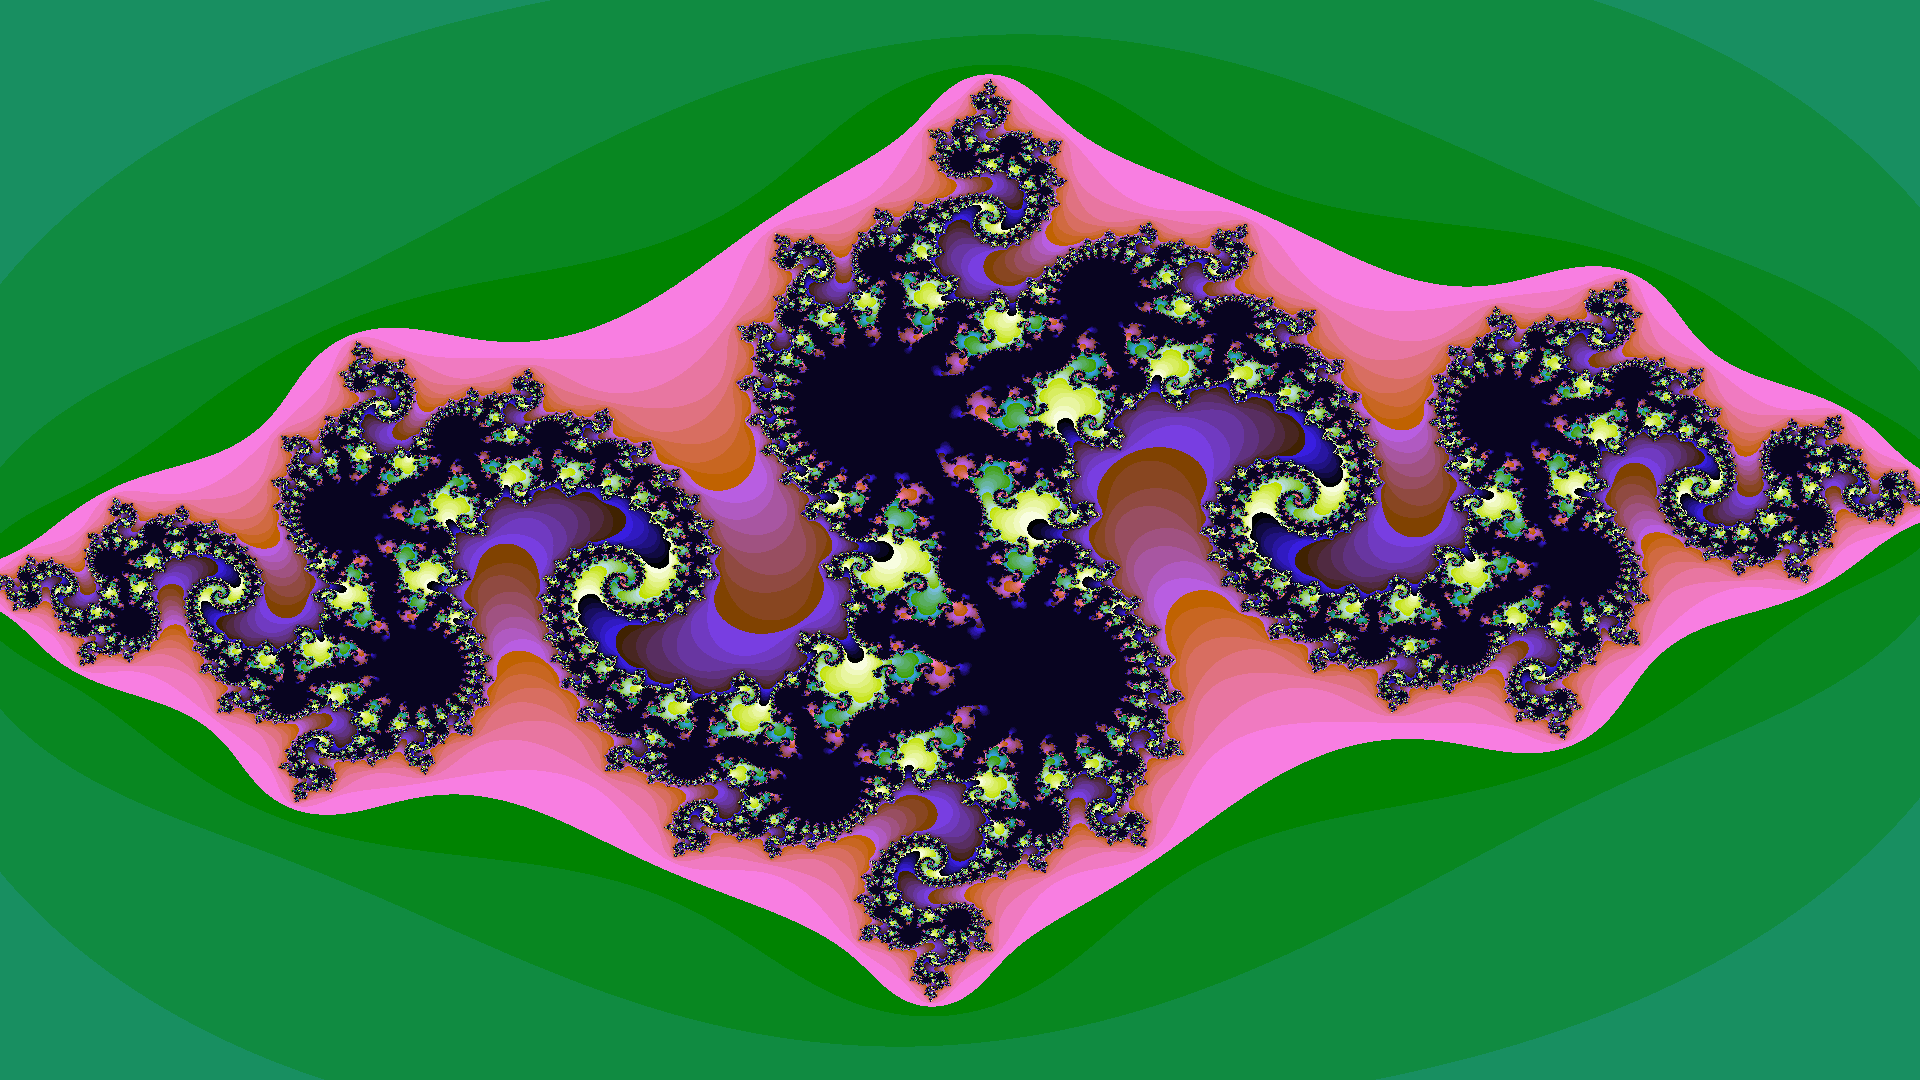

In [34]:
# Python code for Julia Fractal 
from PIL import Image 

# setting the width, height and zoom 
# of the image to be created 
w, h, zoom = 1920, 1080, 1

# creating the new image in RGB mode 
bitmap = Image.new("RGB", (w, h), "white") 

# Allocating the storage for the image and 
# loading the pixel data. 
pix = bitmap.load() 
    
# setting up the variables according to 
# the equation to create the fractal 
cX, cY = -0.8, 0.156
moveX, moveY = 0.0, 0.0
maxIter = 100

for x in range(w): 
    for y in range(h): 
        zx = 1.5*(x - w/2)/(0.5*zoom*w) + moveX 
        zy = 1.0*(y - h/2)/(0.5*zoom*h) + moveY 
        i = maxIter 
        while zx*zx + zy*zy < 4 and i > 1: 
            tmp = zx*zx - zy*zy + cX 
            zy,zx = 2.0*zx*zy + cY, tmp 
            i -= 1

        # convert the value of variable i to a color code using bit shifts
        pix[x,y] = (i << 21) + (i << 10) + i*8

# to display the created fractal 
bitmap